In [7]:
from nmon import *

### E01 vs ng1,2,3

In [8]:
EC_shunt = 0.18

EJM_EC = 3.95
EJN_EC = 42.2


N_ng1 = 5
N_ng2 = 5
N_ng3 = 5
N_flux = 1

ng1_list = np.linspace(0, 1, N_ng1)
ng2_list = np.linspace(0, 1, N_ng2)
ng3_list = np.linspace(0, 1, N_ng3)
flux_list = np.linspace(0, 0.15, N_flux)

w01_list = np.full([N_ng1, N_ng2, N_ng3, N_flux], None, dtype=float)
w12_list = np.full([N_ng1, N_ng2, N_ng3, N_flux], None, dtype=float)
E0_list = np.full([N_ng1, N_ng2, N_ng3, N_flux], None, dtype=float)
E1_list = np.full([N_ng1, N_ng2, N_ng3, N_flux], None, dtype=float)
E2_list = np.full([N_ng1, N_ng2, N_ng3, N_flux], None, dtype=float)
relative_anharm_list = np.full([N_ng1, N_ng2, N_ng3, N_flux], None, dtype=float)

nmon = Nmon(N=2, M=2, EJN=EJN_EC*EC_shunt, EJM=EJM_EC*EC_shunt, EC_shunt=EC_shunt)

for i, ng1 in enumerate(tqdm(ng1_list)):
    for j, ng2 in enumerate(ng2_list):
        for a, ng3 in enumerate(ng3_list):
            for k, flux in enumerate(flux_list):
                try:
                    nmon.hamiltonian_calc(flux=flux, ng=[ng1, ng2, ng3], num_levels=6, make_plot=False, just_H=False, 
                                        cutoff=compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8]))
                    w01_list[i, j, a, k] = nmon.transition_freqs[0]
                    E0_list[i, j, a, k] = nmon.bound_state_energies[0]
                    E1_list[i, j, a, k] = nmon.bound_state_energies[1]

                    if len(nmon.transition_freqs) > 1:
                        w12_list[i, j, a, k] = nmon.transition_freqs[1]
                        E2_list[i, j, a, k] = nmon.bound_state_energies[2]
                        relative_anharm_list[i, j, a, k] = nmon.relative_anharm

                except Exception as e:
                    print(e)
                    continue


100%|██████████| 5/5 [02:09<00:00, 25.92s/it]


In [12]:
format_list = (nmon.N, nmon.M, EJN_EC, EJM_EC,round(nmon.EC_shunt, 2))
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w01_list.npy".format(*format_list), w01_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w12_list.npy".format(*format_list), w12_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E0_list.npy".format(*format_list), E0_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E1_list.npy".format(*format_list), E1_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E2_list.npy".format(*format_list), E2_list)
np.save("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_relative_anharm_list.npy".format(*format_list), relative_anharm_list)

In [13]:
w01_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w01_list.npy".format(*format_list))
w12_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_w12_list.npy".format(*format_list))
E0_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E0_list.npy".format(*format_list))
E1_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E1_list.npy".format(*format_list))
E2_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_E2_list.npy".format(*format_list))
relative_anharm_list = np.load("./data_arrays_ng/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_relative_anharm_list.npy".format(*format_list))

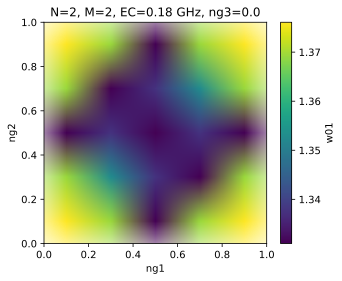

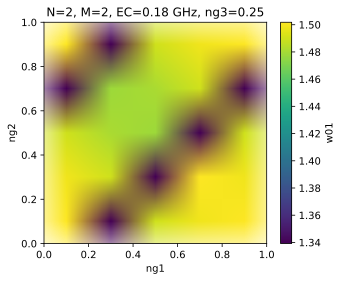

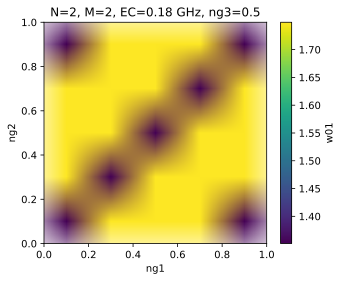

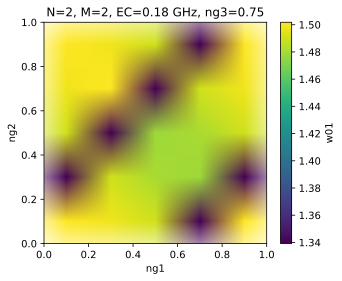

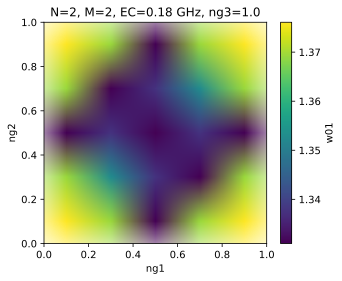

'\n5 : 5\nmax: \n0.75, 0.25, 0\n0.5, 0.5, 0.5\n\nmin:\n0.5, 0.5, 0.0\n\n\n42 : 3\n\n'

In [14]:
for k, ng3 in enumerate(ng3_list):
    
    w01_list_flux = w01_list[ :,:, k, 0]

    ng1_grid, ng2_grid = np.meshgrid(ng1_list, ng2_list)

    plt.figure(figsize=(5, 4))
    # Using imshow for pixel plot
    plt.imshow(w01_list_flux, origin='lower', aspect='auto',
            extent=[ng1_list.min(), ng1_list.max(), ng2_list.min(), ng2_list.max()],
            cmap='viridis', interpolation='none')
    plt.colorbar(label='w01')
    plt.xlabel('ng1')
    plt.ylabel('ng2')

    plt.title("N={}, M={}, EC={} GHz, ng3={}".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 ), ng3))
    # plt.xticks(ticks=np.arange(len(EJM_list[::]))[::2], labels=[f'{round(i/EC_total,1)}' for i in EJM_list[::2]])
    # plt.yticks(ticks=np.arange(len(EJN_list[::]))[::2], labels=[f'{round(i/EC_total,1)}' for i in EJN_list[::2]])
    # plt.savefig("./data_arrays_ng/N={}_M={}_EC_shunt={}_w01_list.pdf".format(nmon.N, nmon.M, round(nmon.EC_shunt, 2)))
    plt.show()

'''
5 : 5
max: 
0.75, 0.25, 0
0.5, 0.5, 0.5

min:
0.5, 0.5, 0.0


42 : 3

'''